In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%config InlineBackend.figure_format = 'retina'

In [5]:
# sklearn 버전 확인
import sklearn
print(sklearn.__version__)

1.6.1


In [25]:
# 데이터 읽어오기
path = '/content/drive/MyDrive/DataForSudy/airquality_simple.csv'
data = pd.read_csv(path)

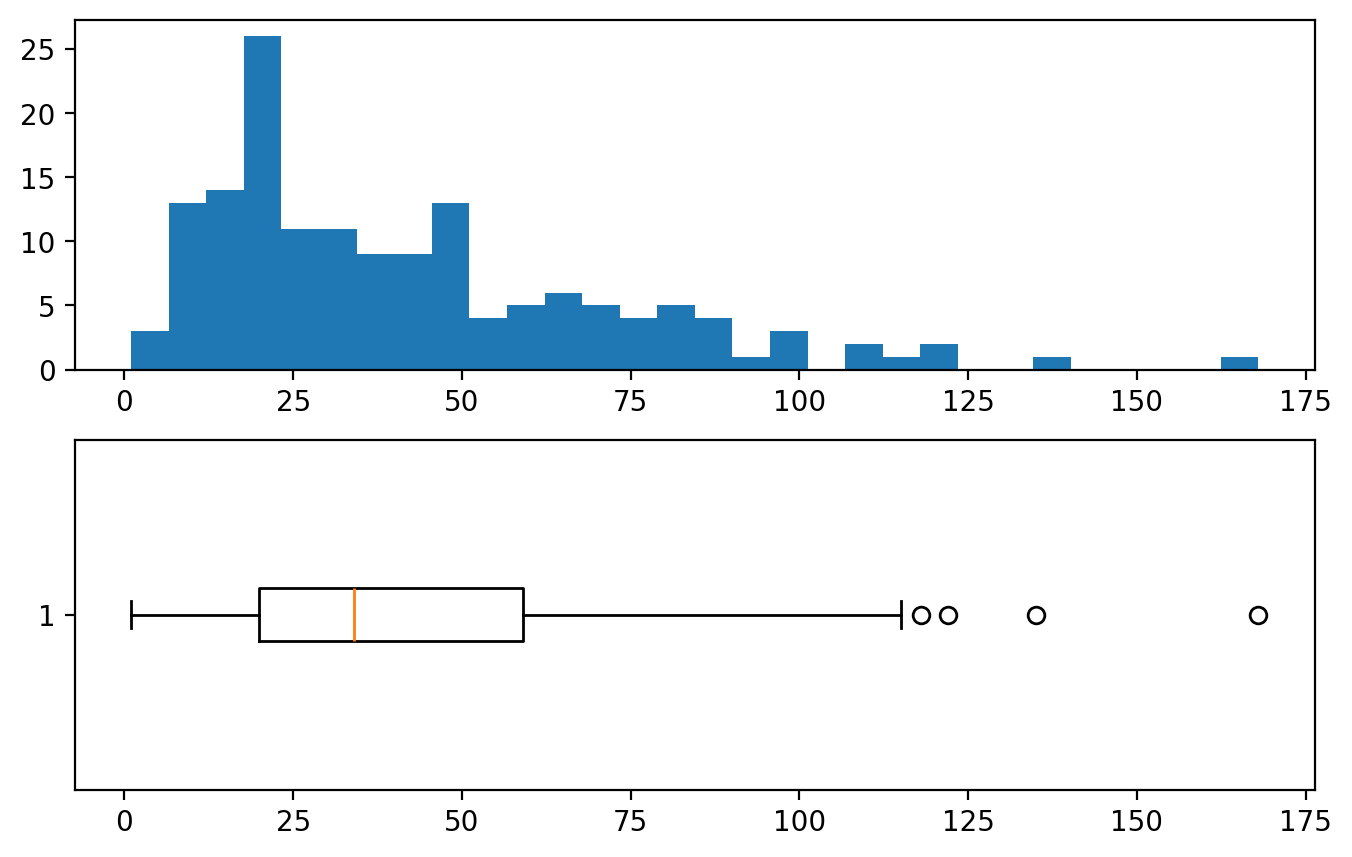

In [26]:
# Target 변수 값 분포 확인
plt.figure(figsize=(8, 5))
plt.subplot(2, 1, 1)
plt.hist(data['Ozone'], bins=30, ec='black')
plt.subplot(2, 1, 2)
plt.boxplot(data['Ozone'], vert=False)
plt.show()

In [27]:
# 상관관계 확인
data.corr(numeric_only=True)

,Ozone,Solar.R,Wind,Temp,Month,Day
Ozone,1.000000,0.280068,-0.605478,0.683372,0.174197,0.004419
Solar.R,0.280068,1.000000,-0.056792,0.275840,-0.075301,-0.150275
Wind,-0.605478,-0.056792,1.000000,-0.457988,-0.178293,0.027181
Temp,0.683372,0.275840,-0.457988,1.000000,0.420947,-0.130593
Month,0.174197,-0.075301,-0.178293,0.420947,1.000000,-0.007962
Day,0.004419,-0.150275,0.027181,-0.130593,-0.007962,1.000000


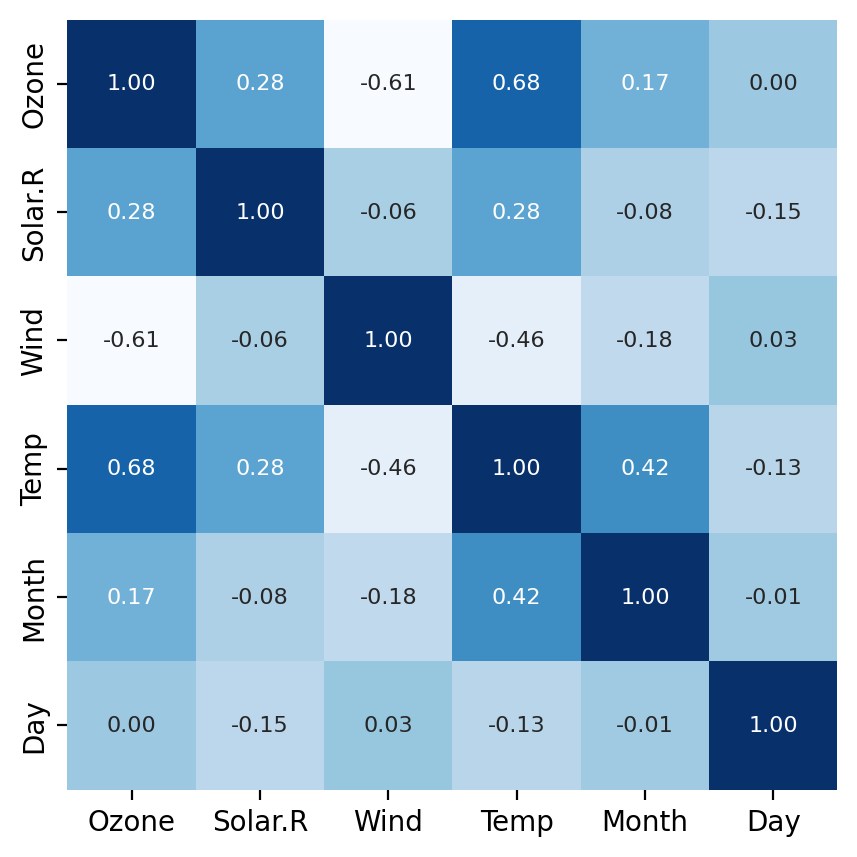

In [28]:
# Heatmap을 통한 상관관계 시각화
plt.figure(figsize=(8, 5))
sns.heatmap(data.corr(numeric_only=True),
            annot=True,
            cmap='Blues',
            fmt='.2f',
            cbar=False,
            square=True,
            annot_kws={'size':8})
plt.show()

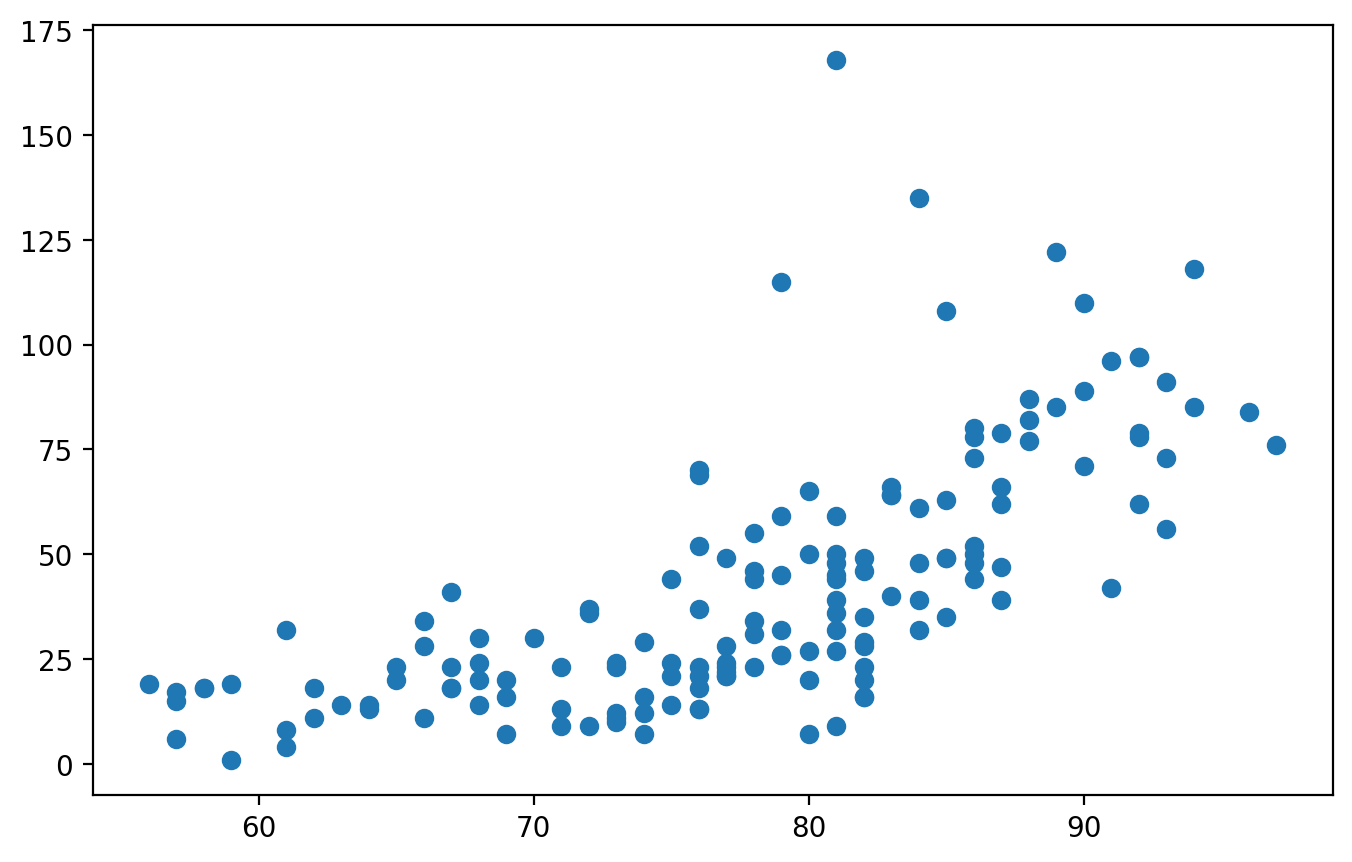

In [29]:
# Temp, Ozone 상관관계
plt.figure(figsize=(8, 5))
plt.scatter(data['Temp'], data['Ozone'])
plt.show()

In [30]:
# 결측치 확인
data.isnull().sum()

,0
Ozone,0
Solar.R,7
Wind,0
Temp,0
Month,0
Day,0


In [31]:
# 전날 가뵹로 결측치 채우기
data.ffill(inplace=True)

#확인
data.isnull().sum()

,0
Ozone,0
Solar.R,0
Wind,0
Temp,0
Month,0
Day,0


In [32]:
# 필요없다고 판단되는 변수 제거
drop_cols = ['Month', 'Day']
data.drop(columns=drop_cols, inplace=True)

#확인
data.head()

,Ozone,Solar.R,Wind,Temp
0,41,190.0,7.4,67
1,36,118.0,8.0,72
2,12,149.0,12.6,74
3,18,313.0,11.5,62
4,19,313.0,14.3,56


In [33]:
# Target 확인
target = 'Ozone'

# 데이터 분리
x = data.drop(target, axis=1)
y = data[target]

In [34]:
# 학습용 평가용 데이터 분리 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [37]:
# 모델링

# 함수 불러오기
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# 모델 선언하기
model = LinearRegression()

#  학습하기
model.fit(x_train, y_train)

# 예측하기
y_pred = model.predict(x_test)

# 평가하기
print(mean_absolute_error(y_test, y_pred))

13.976843190385708


In [38]:
# 예측값, 실젯값 확인
print(y_pred[:5])
print(y_test.values[:5])

[13.84003067  5.82919112 81.93563027 58.41267418 50.86150737]
[24 18 97 47 34]


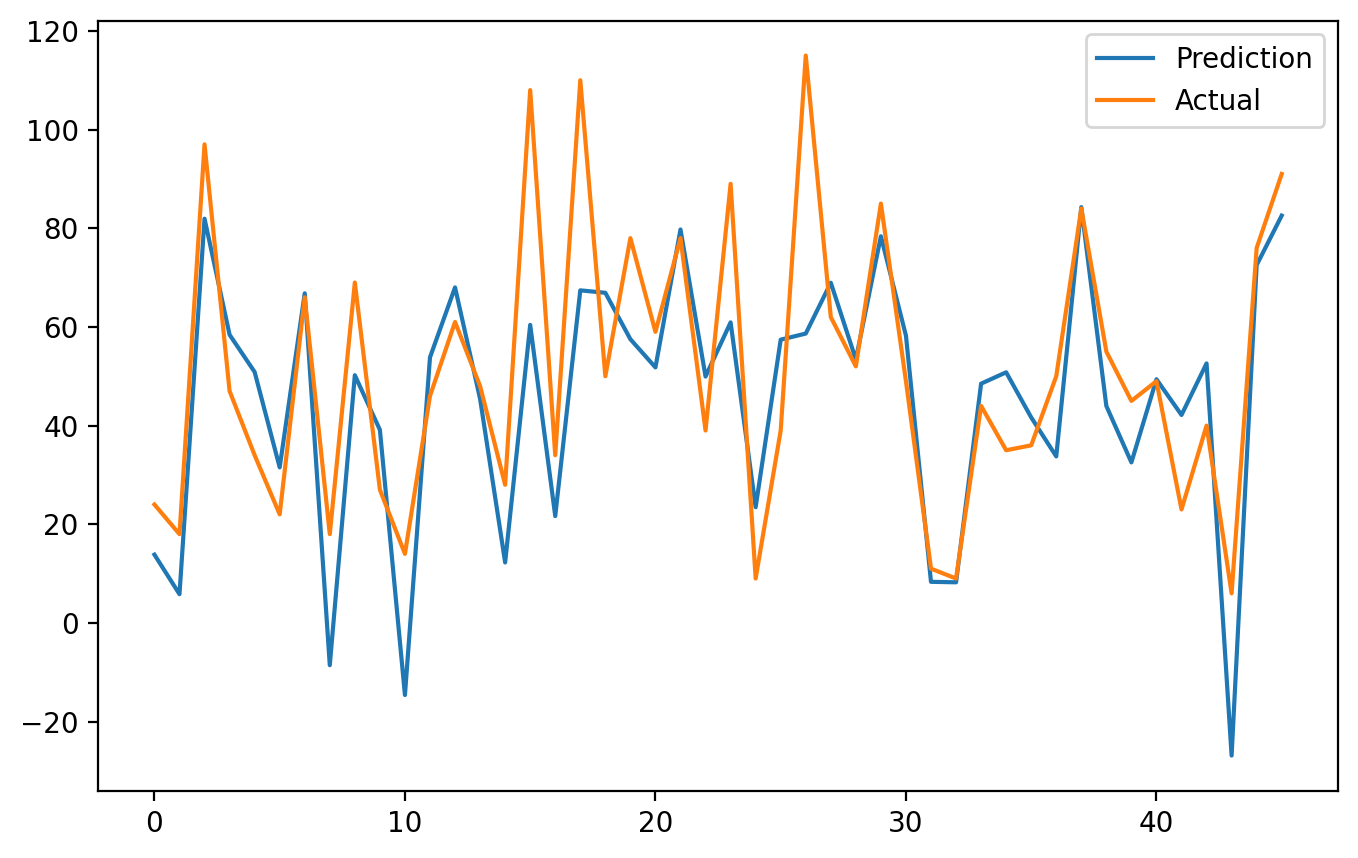

In [39]:
# 예측값, 실젯값 시각화 비교
plt.figure(figsize=(8, 5))
plt.plot(y_pred, label='Prediction')
plt.plot(y_test.values, label='Actual')
plt.legend()
plt.show()